In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications import VGG16
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
train_dir = "train/"
test_dir = "test/"
train_df = pd.read_csv('train.csv')
train_df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


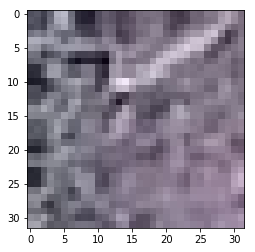

In [4]:
im = cv2.imread("train/01e30c0ba6e91343a12d2126fcafc0dd.jpg")
plt.imshow(im)

In [5]:
vgg16_net = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(32, 32, 3))

11804672/58889256 [=====>........................] - ETA: 56:5 - ETA: 47:1 - ETA: 45:1 - ETA: 40:2 - ETA: 37:4 - ETA: 35:4 - ETA: 34:5 - ETA: 34:0 - ETA: 33:1 - ETA: 29:5 - ETA: 30:4 - ETA: 31:4 - ETA: 31:2 - ETA: 31:5 - ETA: 30:5 - ETA: 31:3 - ETA: 30:3 - ETA: 30:2 - ETA: 29:3 - ETA: 30:0 - ETA: 31:1 - ETA: 30:3 - ETA: 30:2 - ETA: 30:2 - ETA: 30:1 - ETA: 29:3 - ETA: 29:2 - ETA: 29:2 - ETA: 29:5 - ETA: 32:4 - ETA: 35:0 - ETA: 35:1 - ETA: 35:0 - ETA: 34:2 - ETA: 34:1 - ETA: 34:0 - ETA: 34:1 - ETA: 33:4 - ETA: 33:5 - ETA: 33:4 - ETA: 33:3 - ETA: 33:0 - ETA: 33:0 - ETA: 32:5 - ETA: 32:4 - ETA: 32:3 - ETA: 32:3 - ETA: 32:4 - ETA: 34:2 - ETA: 34:2 - ETA: 35:3 - ETA: 36:3 - ETA: 37:1 - ETA: 37:1 - ETA: 38:5 - ETA: 39:1 - ETA: 39:2 - ETA: 38:5 - ETA: 39:1 - ETA: 40:3 - ETA: 42:4 - ETA: 43:1 - ETA: 43:1 - ETA: 43:0 - ETA: 42:4 - ETA: 42:2 - ETA: 42:1 - ETA: 42:1 - ETA: 42:1 - ETA: 41:4 - ETA: 41:3 - ETA: 41:1 - ETA: 41:0 - ETA: 40:3 - ETA: 40:1 - ETA: 40:1 - ETA: 39:4 - ETA: 39:4 - ETA: 39:3 -

23764992/58889256 [===========>..................] - ETA: 32:2 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:0 - ETA: 32:0 - ETA: 32:0 - ETA: 32:0 - ETA: 32:0 - ETA: 31:5 - ETA: 31:5 - ETA: 31:5 - ETA: 31:5 - ETA: 32:0 - ETA: 32:0 - ETA: 32:0 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:2 - ETA: 32:2 - ETA: 32:2 - ETA: 32:2 - ETA: 32:2 - ETA: 32:2 - ETA: 32:2 - ETA: 32:2 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:2 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:1 - ETA: 32:0 - ETA: 32:0 - ETA: 32:0 - ETA: 32:0 - ETA: 32:0 - ETA: 32:0 - ETA: 32:0 - ETA: 32:0 - ETA: 32:0 - ETA: 31:5 - ETA: 31:5 - ETA: 31:5 - ETA: 31:5 - ETA: 31:5 - ETA: 31:5 - ETA: 31:5 - ETA: 31:5 - ETA: 31:5 - ETA: 31:4 - ETA: 31:4 - ETA: 31:4 - ETA: 31:4 - ETA: 31:4 - ETA: 31:4 - ETA: 31:3 - ETA: 31:3 - ETA: 31:3 -

36265984/58889256 [=================>............] - ETA: 21:4 - ETA: 21:4 - ETA: 21:4 - ETA: 21:4 - ETA: 21:4 - ETA: 21:4 - ETA: 21:4 - ETA: 21:4 - ETA: 21:4 - ETA: 21:4 - ETA: 21:4 - ETA: 21:4 - ETA: 21:4 - ETA: 21:4 - ETA: 21:3 - ETA: 21:3 - ETA: 21:3 - ETA: 21:3 - ETA: 21:3 - ETA: 21:3 - ETA: 21:3 - ETA: 21:3 - ETA: 21:2 - ETA: 21:2 - ETA: 21:2 - ETA: 21:2 - ETA: 21:2 - ETA: 21:2 - ETA: 21:2 - ETA: 21:2 - ETA: 21:2 - ETA: 21:2 - ETA: 21:2 - ETA: 21:1 - ETA: 21:1 - ETA: 21:1 - ETA: 21:1 - ETA: 21:1 - ETA: 21:1 - ETA: 21:1 - ETA: 21:1 - ETA: 21:1 - ETA: 21:0 - ETA: 21:0 - ETA: 21:0 - ETA: 21:0 - ETA: 21:0 - ETA: 21:0 - ETA: 21:1 - ETA: 21:1 - ETA: 21:1 - ETA: 21:1 - ETA: 21:1 - ETA: 21:1 - ETA: 21:1 - ETA: 21:1 - ETA: 21:1 - ETA: 21:1 - ETA: 21:0 - ETA: 21:0 - ETA: 21:0 - ETA: 21:0 - ETA: 21:0 - ETA: 21:0 - ETA: 21:0 - ETA: 21:0 - ETA: 21:0 - ETA: 20:5 - ETA: 20:5 - ETA: 20:5 - ETA: 20:5 - ETA: 20:5 - ETA: 20:5 - ETA: 20:5 - ETA: 20:5 - ETA: 20:5 - ETA: 20:5 - ETA: 20:5 - ETA: 20:5 -

49823744/58889256 [========================>.....] - ETA: 12:5 - ETA: 12:5 - ETA: 12:5 - ETA: 12:5 - ETA: 12:5 - ETA: 12:5 - ETA: 12:4 - ETA: 12:4 - ETA: 12:4 - ETA: 12:4 - ETA: 12:4 - ETA: 12:4 - ETA: 12:4 - ETA: 12:4 - ETA: 12:4 - ETA: 12:4 - ETA: 12:4 - ETA: 12:4 - ETA: 12:4 - ETA: 12:4 - ETA: 12:3 - ETA: 12:3 - ETA: 12:3 - ETA: 12:3 - ETA: 12:3 - ETA: 12:3 - ETA: 12:3 - ETA: 12:3 - ETA: 12:3 - ETA: 12:3 - ETA: 12:3 - ETA: 12:3 - ETA: 12:2 - ETA: 12:2 - ETA: 12:2 - ETA: 12:2 - ETA: 12:2 - ETA: 12:2 - ETA: 12:2 - ETA: 12:2 - ETA: 12:2 - ETA: 12:2 - ETA: 12:2 - ETA: 12:2 - ETA: 12:2 - ETA: 12:1 - ETA: 12:1 - ETA: 12:1 - ETA: 12:1 - ETA: 12:1 - ETA: 12:1 - ETA: 12:1 - ETA: 12:1 - ETA: 12:1 - ETA: 12:1 - ETA: 12:1 - ETA: 12:1 - ETA: 12:1 - ETA: 12:1 - ETA: 12:1 - ETA: 12:1 - ETA: 12:1 - ETA: 12:0 - ETA: 12:0 - ETA: 12:0 - ETA: 12:0 - ETA: 12:0 - ETA: 12:0 - ETA: 12:0 - ETA: 12:0 - ETA: 12:0 - ETA: 12:0 - ETA: 12:0 - ETA: 12:0 - ETA: 12:0 - ETA: 11:5 - ETA: 11:5 - ETA: 11:5 - ETA: 11:5 -

58892288/58889256 [==============================] - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4:

In [6]:
vgg16_net.trainable = False
vgg16_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [7]:
model = Sequential()
model.add(vgg16_net)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

In [9]:
X_tr = []
Y_tr = []
imges = train_df['id'].values
for img_id in tqdm_notebook(imges):
    X_tr.append(cv2.imread(train_dir + img_id))    
    Y_tr.append(train_df[train_df['id'] == img_id]['has_cactus'].values[0])  
X_tr = np.asarray(X_tr)
X_tr = X_tr.astype('float32')
X_tr /= 255
Y_tr = np.asarray(Y_tr)

In [10]:
X_tr

array([[[[0.49019608, 0.5411765 , 0.53333336],
         [0.49019608, 0.53333336, 0.5254902 ],
         [0.54901963, 0.5803922 , 0.5764706 ],
         ...,
         [0.5294118 , 0.5058824 , 0.59607846],
         [0.50980395, 0.4862745 , 0.5764706 ],
         [0.54901963, 0.5254902 , 0.6156863 ]],

        [[0.44313726, 0.49411765, 0.4862745 ],
         [0.59607846, 0.6392157 , 0.6313726 ],
         [0.5921569 , 0.62352943, 0.61960787],
         ...,
         [0.57254905, 0.54901963, 0.6392157 ],
         [0.5137255 , 0.49411765, 0.5764706 ],
         [0.5058824 , 0.4862745 , 0.5686275 ]],

        [[0.5882353 , 0.6392157 , 0.6313726 ],
         [0.5921569 , 0.63529414, 0.627451  ],
         [0.5921569 , 0.62352943, 0.61960787],
         ...,
         [0.5254902 , 0.5058824 , 0.5882353 ],
         [0.5686275 , 0.54901963, 0.6313726 ],
         [0.44313726, 0.42352942, 0.5058824 ]],

        ...,

        [[0.47843137, 0.43529412, 0.5372549 ],
         [0.7137255 , 0.67058825, 0.77254903]

In [11]:
Y_tr

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [16]:
batch_size = 32
nb_epoch = 3

In [17]:
# Train model
history = model.fit(X_tr, Y_tr,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Train on 15750 samples, validate on 1750 samples
Epoch 1/3
 - 124s - loss: 0.2868 - acc: 0.8890 - val_loss: 0.2546 - val_acc: 0.9286
Epoch 2/3
 - 124s - loss: 0.2638 - acc: 0.9015 - val_loss: 0.2365 - val_acc: 0.9360
Epoch 3/3
 - 123s - loss: 0.2472 - acc: 0.9123 - val_loss: 0.2219 - val_acc: 0.9394


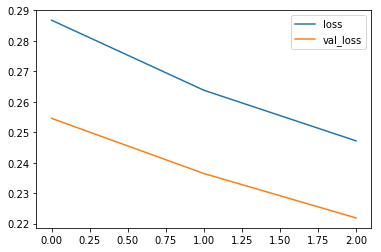

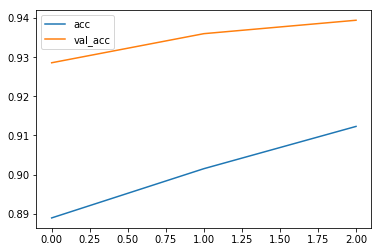

In [18]:
with open('history.json', 'w') as f:
    json.dump(history.history, f)

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()
history_df[['acc', 'val_acc']].plot()

In [19]:
X_tst = []
Test_imgs = []
for img_id in tqdm_notebook(os.listdir(test_dir)):
    X_tst.append(cv2.imread(test_dir + img_id))     
    Test_imgs.append(img_id)
X_tst = np.asarray(X_tst)
X_tst = X_tst.astype('float32')
X_tst /= 255

In [20]:
# Prediction
test_predictions = model.predict(X_tst)

In [21]:
sub_df = pd.DataFrame(test_predictions, columns=['has_cactus'])
sub_df['has_cactus'] = sub_df['has_cactus'].apply(lambda x: 1 if x > 0.75 else 0)

In [22]:
sub_df['id'] = ''
cols = sub_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
sub_df=sub_df[cols]

In [23]:
for i, img in enumerate(Test_imgs):
    sub_df.set_value(i,'id',img)

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [24]:
sub_df.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,1
1,0017242f54ececa4512b4d7937d1e21e.jpg,1
2,001ee6d8564003107853118ab87df407.jpg,0
3,002e175c3c1e060769475f52182583d0.jpg,0
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,1


In [25]:
sub_df.to_csv('submission.csv',index=False)